# Image Contour Overlays

  * THINGS (HI 21cm data): https://www2.mpia-hd.mpg.de/THINGS/Data.html (moment 0 is the intensity map). 
  * Astropy, read a FITS image and plot: https://docs.astropy.org/en/stable/generated/examples/io/plot_fits-image.html#sphx-glr-generated-examples-io-plot-fits-image-py
  
  
 Pulling together existing tutorials KLM. 

In [1]:
%matplotlib inline


# Read and plot an image from a FITS file

This example opens an image stored in a FITS file and displays it to the screen.

This example uses `astropy.utils.data` to download the file, `astropy.io.fits` to open
the file, and `matplotlib.pyplot` to display the image.


*By: Lia R. Corrales, Adrian Price-Whelan, Kelle Cruz*

*License: BSD*


Set up matplotlib and use a nicer set of plot parameters



In [54]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

Download the example FITS files used by this example, and put it in the same folder as this notebook. 

http://data.astropy.org/tutorials/FITS-images/HorseHead.fits

Alternatively use any other .fits image you have. 

In [4]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

image_file = get_pkg_data_filename('HorseHead.fits')

Use `astropy.io.fits.info()` to display the structure of the file:



In [5]:
fits.info(image_file)

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


Generally the image information is located in the Primary HDU, also known
as extension 0. Here, we use `astropy.io.fits.getdata()` to read the image
data from this first extension using the keyword argument ``ext=0``:



In [14]:
image_data = fits.getdata(image_file, ext=0)

The data is now stored as a 2D numpy array. Print the dimensions using the
shape attribute:



In [7]:
print(image_data.shape)

(893, 891)


Display the image data:



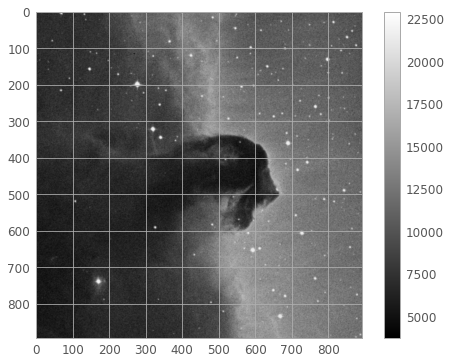

In [8]:
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()

# Adding Co-ordinates

FITS WCS (World Coordinate System) https://fits.gsfc.nasa.gov/fits_wcs.html are a method to save full co-ordinate data in the header of FITS images. 

(this next bit modified from this astropy tutorial: https://learn.astropy.org/tutorials/celestial_coords1.html) 

Most of the time we can obtain the required astropy.wcs.WCS object from the header of the FITS file from a telescope or astronomical database. This process is described below.

This assumes you already have the Horsehead nebula image loaded. You can obtain other fits files from other patches of sky from the Digitized Sky Survey https://archive.eso.org/dss/dss. 

We can print the FITS image header to screen so that all of its contents can be checked or utilized. Note that the WCS information for this information can be found near the bottom of the printed header, below.

In [17]:
from astropy.wcs import WCS
header = fits.getheader(image_file, ext=0)
header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

## Read in the FITS image coordinate system with astropy.wcs.WCS

Because the header contains WCS information and acts like a Python dictionary, an Astropy WCS object can be created directly from the FITS header.

In [18]:
wcs_helix = WCS(header)

Let's print the WCS object to see what values were drawn from the header.

In [19]:
wcs_helix

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 85.59941666666666  -4.946638888888889  
CRPIX : -716.333144294269  -8444.64946698226  
PC1_1 PC1_2  : 0.015029018460682027  -9.63735777657198e-06  
PC2_1 PC2_2  : 1.0548917307845708e-05  0.015000473845055023  
CDELT : -0.018654788242111486  0.018654788242111486  
NAXIS : 891  893

### Plot the Image with sky coordinate axes (RA and Dec)
The image data, image, is a 2D array of values, and by itself contains no information about the sky coordinates of the pixels. So, if we plotted the image by itself, the plot axes would show pixel values. (We will be using the matplotlib library for the plotting.)

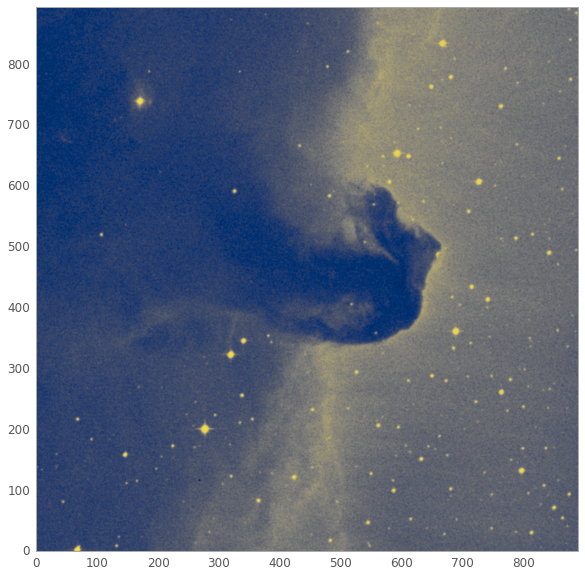

In [72]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(image_data, origin='lower', cmap='cividis')
plt.grid() #Remove the grid

All of the information that maps from these pixel values to sky coordinates comes from the WCS metadata, which we loaded into the wcs_helix object (from the FITS file header). This WCS object is built so that it can be provided to matplotlib with the projection keyword, as shown in the call to matplotlib.pyplot.subplot below, in order to produce axes that show sky coordinate information instead of pixel values. We will also overlay a coordinate grid in ICRS equatorial coordinates by passing the sky coordinate frame name (here, "icrs") to the ax.get_coords_overlay() method.

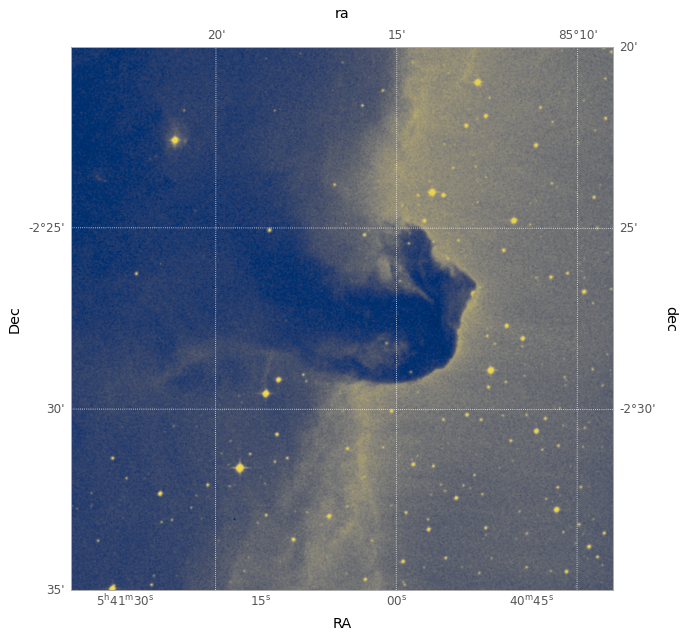

In [71]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.imshow(image_data, origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')
plt.grid()

overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')
plt.show()

Now instead we will overlay a coordinate grid in Galactic coordinates. WCS makes that easy. :) 

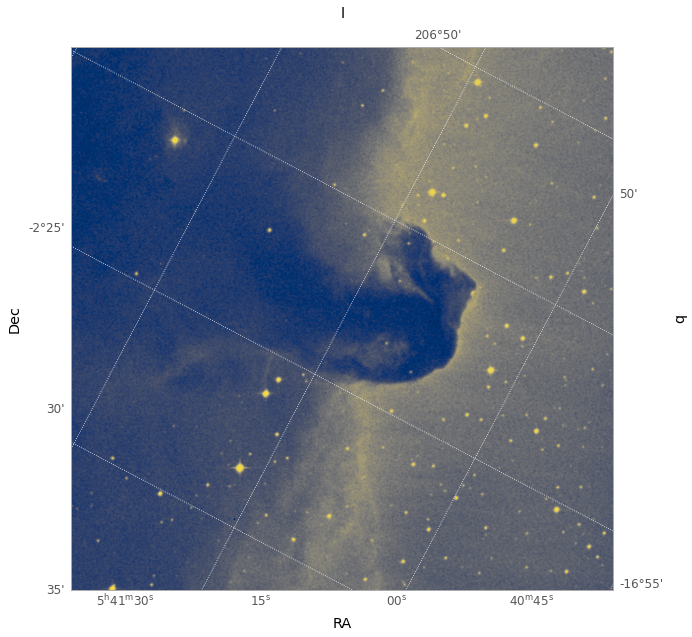

In [70]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.imshow(image_data, origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')
plt.grid()

overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='white', ls='dotted')

### Plot a scale marker on an image with WCS
To add a scale marker (i.e., a line of a particular angular size) to the image of the Helix nebula, we will use the matplotlib Axes.arrow method to draw a line.

First, we need to decide where to place the scale bar. In the example below, we define the center of the scale marker to be at (RA, Dec) = (85 deg, -2.5 deg). (You will need to adjust this if you use a different image). 

We then use the transform attribute of Axes.arrow to draw our scale bars in degrees (instead of pixel coordinates). In this case, we draw a scale marker with a length of 0.1 degrees. The arrow method inputs are ```ax.arrow(x, y, dx, dy, **kwargs)```, with x and y being the RA and Dec of the beginning of the line. We use dx=0 so that there is no horizontal component in the bar, and dy=0.1, which gives the length of the arrow in the vertical direction. To ensure that the arrow is drawn in the J2000 ICRS coordinate frame, we pass ax.get_transform('icrs') to the transform keyword.

Finally, we use matplotlib.pyplot.text to mark the length of the scale marker.

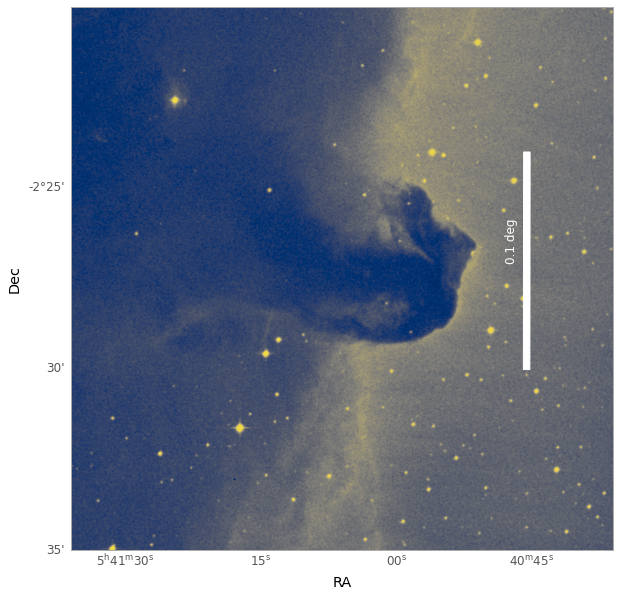

In [69]:
fig = plt.figure(figsize=(10, 10), frameon=False)
ax = plt.subplot(projection=wcs_helix)
ax.arrow(85.19, -2.5, 0, 0.1, 
         head_width=0, head_length=0, 
         fc='white', ec='white', width=0.003, 
         transform=ax.get_transform('icrs'))
plt.text(85.2, -2.45, '0.1 deg', 
         color='white', rotation=90, 
         transform=ax.get_transform('icrs'))
plt.imshow(image_data, origin='lower', cmap='cividis', aspect='equal')
plt.grid()
plt.xlabel(r'RA')
plt.ylabel(r'Dec')

# Now lets try some contours

We'll read in some radio imaging data and try adding contours. 

I'm using a 'ro' moment 0 map of a galaxy from here: https://www2.mpia-hd.mpg.de/THINGS/Data.html (which is a bunch of 21cm line maps). 

I actually had to open this in DS9 and save a slice only (for reasons). So I'm importing the sliced data (which I put in Github for you)

In [44]:
radio_image_file = get_pkg_data_filename('NGC_3184_Mon0Slice.fits')

In [45]:
fits.info(radio_image_file)

Filename: NGC_3184_Mon0Slice.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     713   (1024, 1024)   float32   


In [46]:
radioimage= fits.getdata(radio_image_file, ext=0)
radioheader = fits.getheader(radio_image_file, ext=0)

In [47]:
wcs_radio = WCS(radioheader)

In [48]:
wcs_radio

WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  ''  'FREQ'  
CRVAL : 154.570416667  41.4244444444  0.0  1416909373.7  
CRPIX : 512.0  513.0  0.0  -27.0  
NAXIS : 1024  1024

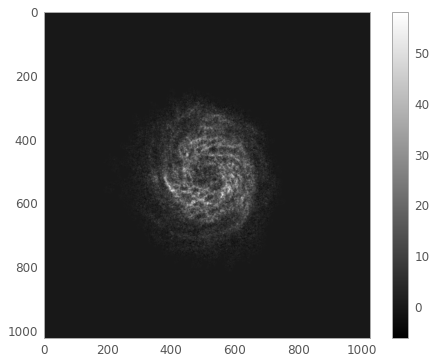

In [73]:
plt.figure()
plt.imshow(radioimage, cmap='gray')
plt.colorbar()
plt.grid()

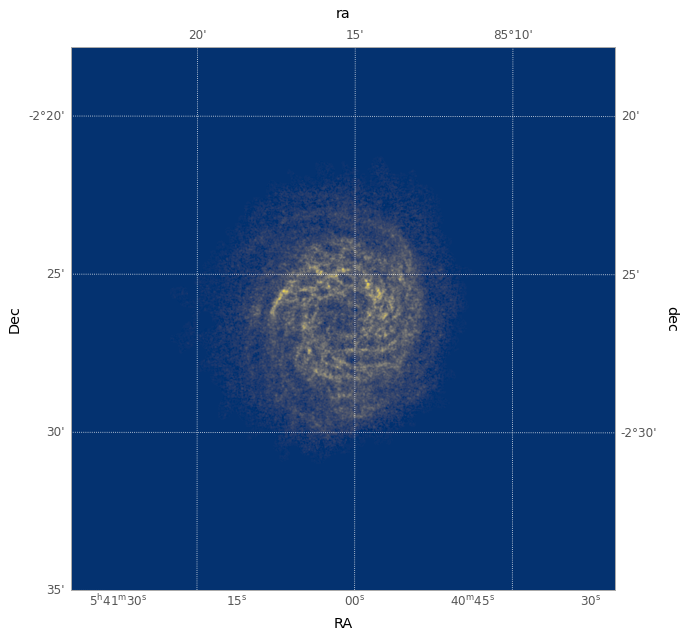

In [68]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.imshow(radioimage, origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')
plt.grid()


overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')
plt.show()

Add some contours, but it's a pain to find the right contours! I haven't yet! 

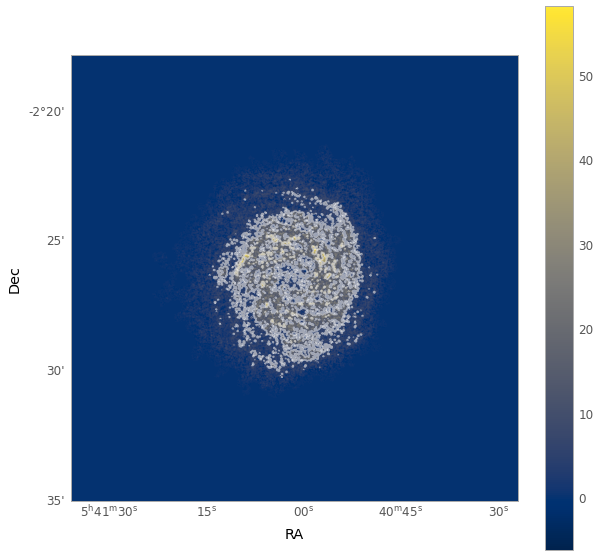

In [93]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.imshow(radioimage, origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')
plt.grid()

plt.colorbar()
plt.contour(radioimage, levels=[10, 30], colors='white', alpha=0.5)

plt.show()



Combine the two (makes no sense, but does work - make these be of the same bit of sky!). 

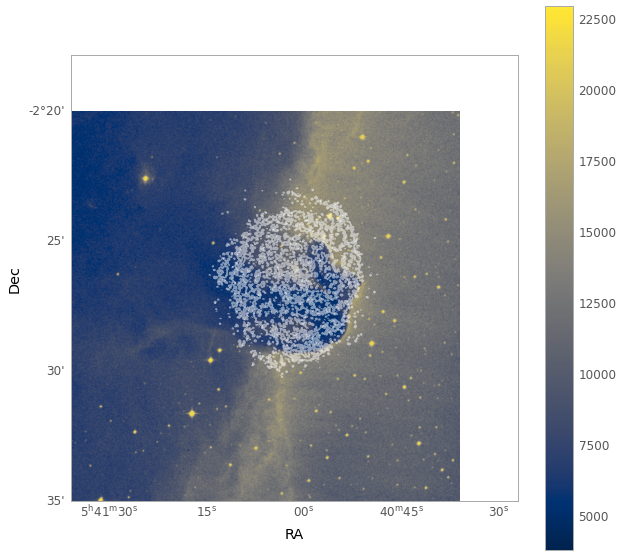

In [92]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.imshow(image_data, origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')
plt.grid()

plt.colorbar()
plt.contour(radioimage, levels=[10, 30], colors='white', alpha=0.5)

plt.show()
